In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random as rd
import scipy.stats as stats
from numpy.random import random as rand
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import balanced_accuracy_score

In [2]:
from pdb import set_trace
class LogisticRegression:
    def __init__(self,alpha=0.001):
        self.alpha = alpha
    def train(self,X_train,y_train):
        #set_trace()
        np.random.seed(234)
        n = X_train.shape[1]
        m = y_train.size
        contador = 1
        somatorios = [0]*n
        self.W = rand(n)
        self.X_train = X_train
        while (contador < 100000):

            h = 1/(1+np.exp(-(np.dot(self.W,X_train.T))))
            for j in range(n):
                somatorios[j] = ((h - y_train)*X_train[:,j]).sum()

            for k in range(n):
                self.W[k] = self.W[k] - (self.alpha/m)*somatorios[k]
            contador += 1
    def test(self,X_test):
        y_pred = 1/(1+np.exp(-(np.dot(self.W,X_test.T)))) > 0.5
        return y_pred

In [3]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

df = pd.DataFrame(pd.read_csv("cancerdata.csv"))
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)
df['diagnosis'] = pd.to_numeric(df['diagnosis'])
y = df['diagnosis'].to_numpy()
x = [None]*4
x[0] = (df.area_mean.values-df.area_mean.values.min())/(df.area_mean.values.max()-df.area_mean.values.min())
x[1] = (df.texture_mean.values-df.texture_mean.values.min())/(df.texture_mean.values.max()-df.texture_mean.values.min())
x[2] = (df.smoothness_mean.values-df.smoothness_mean.values.min())/(df.smoothness_mean.values.max()-df.smoothness_mean.values.min())
x[3] = (df.concavity_mean.values-df.concavity_mean.values.min())/(df.concavity_mean.values.max()-df.concavity_mean.values.min())
X = np.array([[1]*len(x[0]), x[0], x[1], x[2], x[3]]).T
print(X.shape, y.size)

skf = StratifiedKFold(n_splits = 10)
#print([(i,j) for i,j in skf.split(X, y)])

(569, 5) 569


In [4]:
LR = LogisticRegression()
y_pred = []
acc = []
cont = 0
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index.size, "TEST:", test_index.size)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LR.train(X_train,y_train)
    y_pred.append(LR.test(X_test))
    acc.append(balanced_accuracy_score(y_test,y_pred[cont]))
    cont += 1


TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 512 TEST: 57
TRAIN: 513 TEST: 56


In [5]:
np.mean(acc)


0.8565728715728715

In [6]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)): 
    if y_pred[i] == 1 and y_test[i] == 1:
       TP += 1
    if y_pred[i] == 1 and y_test[i] == 0:
       FP += 1
    if y_pred[i] == 0 and y_test[i] == 0:
       TN += 1
    if y_pred[i] == 0 and y_test[i] == 1:
       FN += 1
print("True Positive = " ,TP,"\nFalse Positive =",FP,"\nTrue Negative = ",TN,"\nFalse Negative =", FN)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<AxesSubplot:>

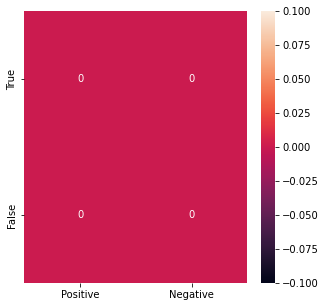

In [7]:
array = [[TP,TN],[FP,FN]]
df_cm = pd.DataFrame(array, index = [i for i in ["True","False"]],
                  columns = [i for i in ["Positive","Negative"]])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

In [3]:
syn0 = 2*np.random.random((3,4)) - 1
syn0

array([[-0.82111739,  0.96875935,  0.3280034 ,  0.63766562],
       [-0.52496849,  0.54798734,  0.68604523,  0.71586986],
       [ 0.26104112, -0.14333164,  0.90759892,  0.41476855]])